In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
np.random.seed(15)
data =  np.array([0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0]).reshape(5,5)
xs = np.c_[np.ones([data.shape[0]]), data] 
xs

array([[1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

In [3]:
ys = np.array([0, 0, 0, 3, 3])
ys.resize(5,1)
ys

array([[0],
       [0],
       [0],
       [3],
       [3]])

In [4]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [21]:
ins = 5
outs = 1
nodes = 15

wi = weights(ins+1, nodes)
ws = weights(nodes, outs) 

err = []
for i in range(2000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = yh - ys           
    e = np.sum(np.abs(e)) 
    if e < 0.05:
        print('we have converged after {} iterations'.format(i))
        print(wi)
        print(ws)
        break
    else: 
        mutation = weights(nodes, outs)*0.02
        cw = ws + mutation
        
        x = xs @ wi
        x = np.sin(x)
        yh = x @ cw
        ce = yh - ys
        ce = np.sum(np.abs(ce))
        if ce < e:
            ws = cw
            err.append(e)

we have converged after 1419 iterations
[[ 1.51319914 -0.91030091  0.08167410 -0.08479192 -0.24712732 -0.28549524
  -1.14867151  0.46729987  1.15538191 -1.76725177  0.28469381 -0.80508483
   0.42725096 -0.00151445 -0.96577883]
 [ 1.46257400  0.44698913  0.63892280  0.00745558  1.04038507  1.97881471
   1.36862851  0.28185789  0.87936547 -0.96734123  0.06793982 -2.42522279
   0.69317356  0.65615610  0.11100730]
 [ 0.83174135 -0.47923326  0.29837053  0.52798690  0.36635988  0.63418629
   0.37565182 -0.74787666 -1.61654870 -0.51495624  0.14430130  1.29141037
  -0.34355635 -0.71081737 -0.04573376]
 [ 0.11951657 -0.11273176  2.64000820 -0.54138374  1.45827450 -0.82589738
  -0.64669690  0.18357451  0.59739346 -0.38490312 -0.76980516  0.95760928
  -0.94218604  0.65416312 -1.17775640]
 [-0.05638099  1.51956600  1.33174202  0.04816350 -0.05389157 -0.36407632
   1.49139342 -0.37342763  1.04424392 -1.00211880  0.36470102 -2.25863875
  -0.13211349 -0.77979742 -0.26529332]
 [-1.63815338 -1.48460246

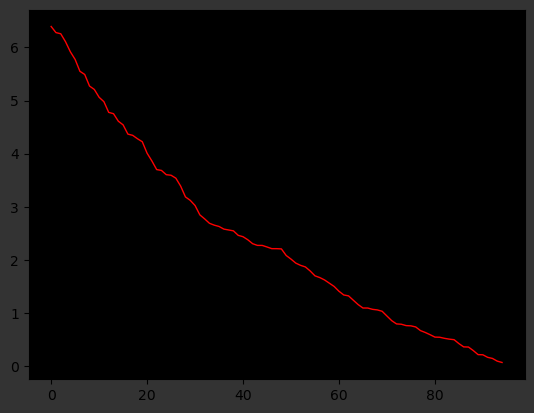

In [6]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [7]:
len(err), min(err), err[0]

(95, 0.0661606965531043, 6.395980183808662)

In [18]:
np.set_printoptions(suppress=True, floatmode='fixed')
#np.set_printoptions(suppress=True, floatmode='unique')

In [19]:
print(ys)
print(yh)

[[0]
 [0]
 [0]
 [3]
 [3]]
[[ 0.00360923]
 [-0.00127906]
 [ 0.00040325]
 [ 3.02143455]
 [ 2.98027277]]


In [22]:
x = xs[3] @ wi
x = np.sin(x)
solution_ = x @ ws
solution_, ys[3] #see what happend?

(array([2.99574375]), array([3]))